# Visualizing computational graphs with MiniTorch



### Forward computational graph

In [1]:
from mytorch.tensor import Tensor
import mytorch.nn.module as nn
from mytorch import tensor
import mytorch.nn.functional as F

In [2]:
a = Tensor.normal(3, 4, (30, 30, 2), requires_grad=True, name="a")
b = Tensor.normal(10, 2, (30, 30, 1), requires_grad=True, name="b")

c = a + b
d = c.relu()
e = c.sigmoid()
f = d * e
g = (f * e)
h = g.relu()
r = h.max()
s = tensor.cat([f,g],0)


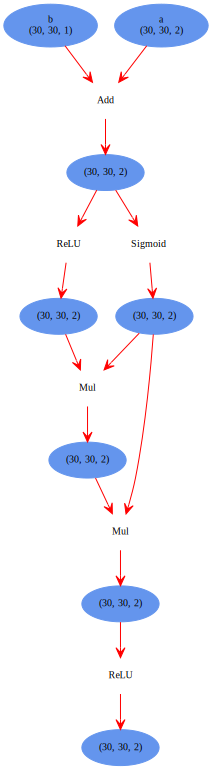

In [3]:
h.plot_forward()

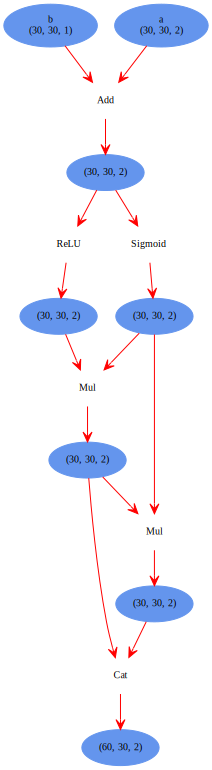

In [4]:
s.plot_forward()

In [5]:
class ANet(nn.Module):
    def __init__(self):
        super(ANet, self).__init__()

        self.block1 = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU()
        )

        self.block2 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(128, 10),
            nn.ReLU()
        )
    
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        return x

In [6]:
X = Tensor.normal(5, 2, (16, 784), name="input")
Y = Tensor.zeros(16, 1)
model = ANet()

# Forward pass
Y_pred = model(X)
Y_pred.name = "preds"


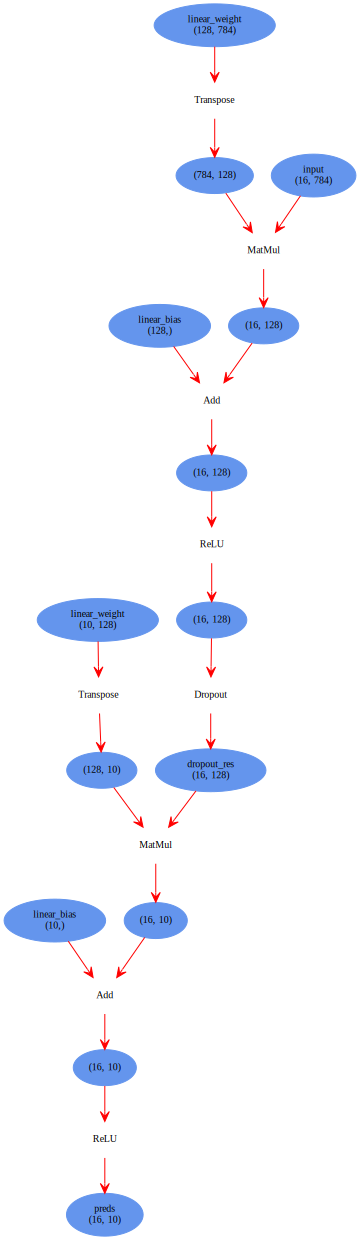

In [7]:
Y_pred.plot_forward('TB')

### Backward

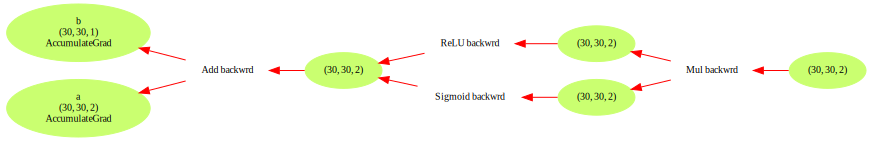

In [8]:
f.plot_backward()

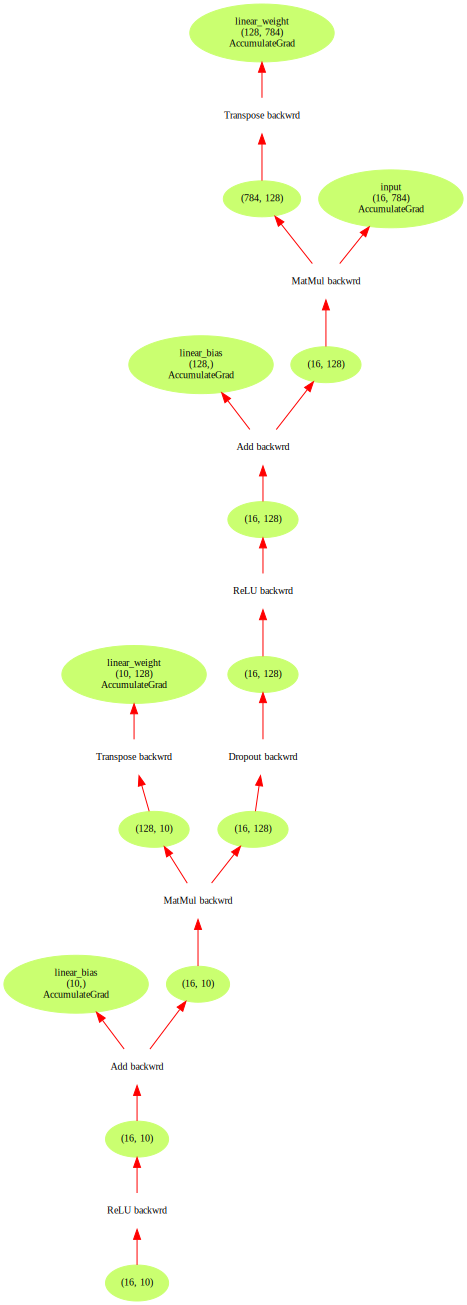

In [9]:
Y_pred.plot_backward('TB')

In [10]:
class ANet(nn.Module):
    def __init__(self):
        super(ANet, self).__init__()

        self.block1 = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU()
        )

        self.block2 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(128, 10),
            nn.ReLU()
        )
    
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        return x

In [11]:
# With square kernels and equal stride
m = nn.Conv2d(16, 33, 3, stride=2)
# non-square kernels and unequal stride and with padding
m = nn.Conv2d(16, 33, 3, stride=2 )
# non-square kernels and unequal stride and with padding and dilation
input = Tensor.randn(20, 16, 50, 100)
output = m(input)

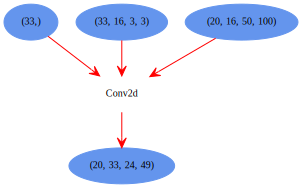

In [12]:
output.plot_forward()

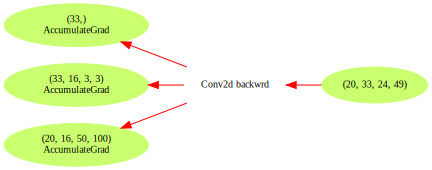

In [13]:
output.plot_backward()